# scHCL
Fixing the reference, as there's multiple problems there:

1. some of the gene names are note canonical, this is fixed via main.renames
2. after fixing this, some genes are present multiple times: 
    - In the original dataset, the gene AND it's alias where present as two columns
    - probably, because two different datasets got aggregated, on which refered to the gene as the correct name, the other as the alias
    - hence, we never should see the these genes cooexpressed anywhere


In [1]:
from scHCLpy import main
import collections
import pandas as pd
import pathlib
import matplotlib.pyplot as plt

In [2]:
reference_df = main.load_reference()
collections.Counter(reference_df.columns).most_common(20)

[('CD163', 1),
 ('F13A1', 1),
 ('STAB1', 1),
 ('VSIG4', 1),
 ('MRC1', 1),
 ('LILRB5', 1),
 ('RNASE1', 1),
 ('C1QA', 1),
 ('TNFAIP2', 1),
 ('SIGLEC1', 1),
 ('MSR1', 1),
 ('MS4A4A', 1),
 ('MAN1A1', 1),
 ('SLCO2B1', 1),
 ('FCGR2B', 1),
 ('PDK4', 1),
 ('LYVE1', 1),
 ('C3AR1', 1),
 ('RASGEF1B', 1),
 ('FOLR2', 1)]

the the raw data 

In [74]:
q = pd.read_csv(pathlib.Path(main.__file__).parent / 'data' / 'scHCL_ref.expr.csv.gz', sep=',', index_col=0).T

This is the list of genes that are present as correct AND alias

In [69]:
duplicates = [(k,v) for k,v in main.renames.items() if v in q.columns]
duplicates

[('NOV', 'PLXNA1'),
 ('AMICA1', 'JAML'),
 ('KIAA0125', 'FAM30A'),
 ('ADRBK1', 'GRK2'),
 ('IL8', 'CXCL8'),
 ('PTPLAD2', 'HACD4'),
 ('C19orf59', 'MCEMP1'),
 ('GPR116', 'ADGRF5'),
 ('ELTD1', 'ADGRL4'),
 ('PPAP2A', 'PLPP1'),
 ('PPAP2B', 'PLPP3'),
 ('FAM132B', 'ERFE'),
 ('FIGF', 'VEGFD'),
 ('SGOL1', 'SGO1'),
 ('IGJ', 'JCHAIN'),
 ('DARC', 'ACKR1'),
 ('KIAA1244', 'ARFGEF3'),
 ('GPR56', 'ADGRG1'),
 ('ERO1LB', 'ERO1B'),
 ('MIR143HG', 'CARMN'),
 ('FAIM3', 'FCMR'),
 ('PPAP2C', 'PLPP2'),
 ('CCDC109B', 'MCUB'),
 ('COX1', 'PTGS1'),
 ('RNR1', 'NR4A2'),
 ('COX2', 'PTGS2'),
 ('ND6', 'MT-ND6'),
 ('CYBASC3', 'CYB561A3'),
 ('HLA-DQB', 'HLA-DQB1'),
 ('LPPR1', 'PLPPR1'),
 ('AGPAT9', 'LPCAT1'),
 ('FAM60A', 'SINHCAF'),
 ('MIR4435-1HG', 'MIR4435-2HG'),
 ('GPR98', 'ADGRV1'),
 ('BZRAP1', 'TSPOAP1'),
 ('HRSP12', 'RIDA'),
 ('PTPLA', 'HACD1'),
 ('C12orf39', 'SPX'),
 ('CGB', 'CGB3'),
 ('C6orf221', 'KHDC3L'),
 ('TUBB4Q', 'TUBB7P'),
 ('PLAC1L', 'OOSP2')]

usually, these pairs are expressed mutualy exclusive, which would indicate that its just different names in different datasets.
However, here are the exceptions

NOV PLXNA1 255 

COX1 PTGS1 1 

RNR1 NR4A2 11 

COX2 PTGS2 8 

HLA-DQB HLA-DQB1 10 

AGPAT9 LPCAT1 41 



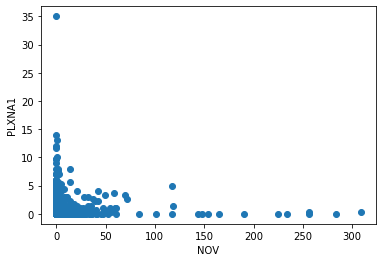

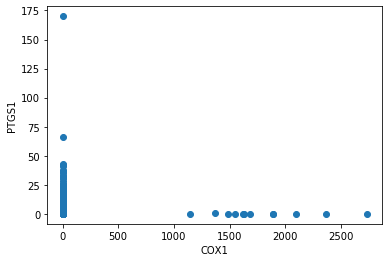

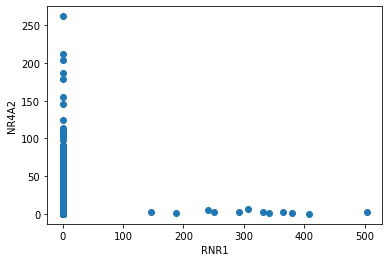

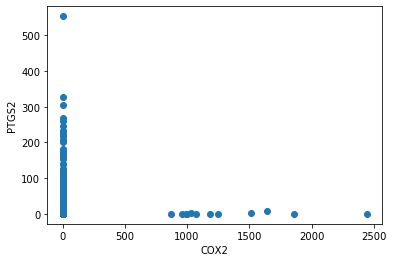

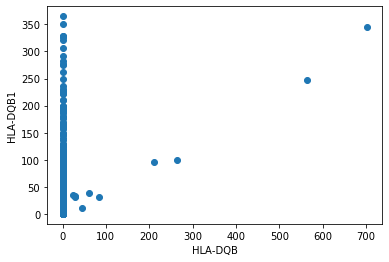

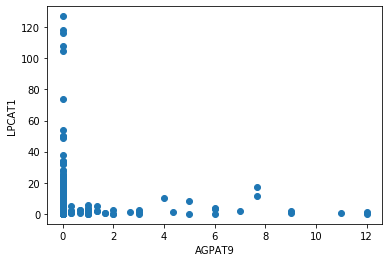

In [70]:
for p1, p2 in duplicates:
    p1_experiments = q[q[p1] > 0].index
    p2_experiments = q[q[p2] > 0].index
    if set(p1_experiments) & set(p2_experiments) != set():
        
        print(p1, p2, len(set(p1_experiments) & set(p2_experiments)), '\n')
        plt.figure()
        plt.scatter(q[p1], q[p2])
        plt.xlabel(p1)
        plt.ylabel(p2)

These are probably wrong mappings on my side

In particular:
- NOV -> CCN3
- AGPAT9 -> GPAT3

For COX1, COX2 and RNR1, its just unclear what these are supposed to be, so lets drop then

In [72]:
q = {'a': 1,'b':6}
q.update({'c':3, 'a':6})

In [78]:
df_ref = pd.read_csv(pathlib.Path(main.__file__).parent / 'data' / 'scHCL_ref.expr.csv.gz', sep=',', index_col=0).T
df_ref = np.log(df_ref+1)


In [77]:
import numpy as np

In [81]:
    _tmp_renames = renames.copy()
    _tmp_renames.update(HLA_renames)
    _tmp_renames.update(manual_renames)  # this should overwrite some of the wrong automatic renames!

    df_ref = df_ref.rename(_tmp_renames, axis=1)


In [85]:
collections.Counter(df_ref.columns).most_common(10)

[('HLA-DQB1', 3),
 ('ADGRV1', 2),
 ('CXCL8', 2),
 ('ACKR1', 2),
 ('ADGRF5', 2),
 ('ADGRL4', 2),
 ('HLA-DQA1', 2),
 ('JCHAIN', 2),
 ('FCMR', 2),
 ('VEGFD', 2)]

In [92]:
df_ref['JCHAIN'].sum(1)

M2.Macrophage.Adult.Adipose1.          0.287682
Stromal.cell.Adult.Adipose1.           0.000000
Adipocyte_SPP1.high.Adult.Adipose1.    0.000000
Mast.cell.Adult.Adipose1.              0.000000
Adipocyte._FGR.high.Adult.Adipose1.    0.000000
                                         ...   
Round.spermatid.Testis_Guo.            0.000000
Elongated.spermatid.Testis_Guo.        0.000000
Sperm1.Testis_Guo.                     0.000000
Sperm2.Testis_Guo.                     0.000000
Macrophage.Testis_Guo.                 0.000000
Length: 1841, dtype: float64

In [3]:
    cols = []
    all_genes = df_ref.columns.unique()
    for gene in all_genes:
        series = df_ref[gene].sum(1)
        series.name=gene
        cols.append(series)

NameError: name 'df_ref' is not defined

In [97]:
df_ref[['JCHAIN']]

,JCHAIN,JCHAIN
M2.Macrophage.Adult.Adipose1.,0.287682,0.0
Stromal.cell.Adult.Adipose1.,0.000000,0.0
Adipocyte_SPP1.high.Adult.Adipose1.,0.000000,0.0
Mast.cell.Adult.Adipose1.,0.000000,0.0
Adipocyte._FGR.high.Adult.Adipose1.,0.000000,0.0
...,...,...
Round.spermatid.Testis_Guo.,0.000000,0.0
Elongated.spermatid.Testis_Guo.,0.000000,0.0
Sperm1.Testis_Guo.,0.000000,0.0
Sperm2.Testis_Guo.,0.000000,0.0


In [5]:
    df_ref = reference_df    
    cols = []
    all_genes = df_ref.columns.unique()
    for gene in all_genes:
        series = df_ref[[gene]].sum(1)  # [[]] needed: if just single occurance [genename] would be a series that we cant sum across
        series.name = gene
        cols.append(series)

In [7]:
len(w.columns)

6027

In [8]:
len(w.columns.unique())

6027

In [10]:
w

,CD163,F13A1,STAB1,VSIG4,MRC1,LILRB5,RNASE1,C1QA,TNFAIP2,SIGLEC1,...,C10orf62,TPPP2,IQCF3,TSSK6,UBL4B,SPATA3,TCP11,SPATA42,PROCA1,RP11-404O13.5
M2.Macrophage.Adult.Adipose1.,6.016157,5.472271,5.155217,5.243509,4.992698,4.105394,6.669498,6.172396,4.666579,3.646320,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000
Stromal.cell.Adult.Adipose1.,5.093750,4.330733,4.048882,3.976562,4.043051,3.367296,5.709323,5.232890,4.077537,2.538974,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Adipocyte_SPP1.high.Adult.Adipose1.,5.655992,3.970292,4.204693,4.543295,4.290459,3.135494,5.891644,5.594711,3.367296,1.945910,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000
Mast.cell.Adult.Adipose1.,5.755742,5.252273,5.105945,4.736198,4.948760,4.330733,6.648985,6.098074,4.644391,3.583519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Adipocyte._FGR.high.Adult.Adipose1.,6.093570,4.553877,4.795791,5.135798,4.934474,4.276666,6.483107,6.003887,3.610918,2.772589,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Round.spermatid.Testis_Guo.,0.287682,0.000000,0.000000,0.287682,0.000000,0.000000,0.693147,0.000000,0.847298,0.000000,...,3.091042,3.555348,3.713572,2.159484,4.013375,2.036882,4.560870,2.397895,4.083171,0.000000
Elongated.spermatid.Testis_Guo.,0.000000,0.000000,0.000000,0.000000,0.980829,0.000000,0.510826,0.000000,1.098612,0.000000,...,4.724434,4.781921,4.679040,4.553877,4.503507,3.931826,4.628235,4.543295,4.631487,0.980829
Sperm1.Testis_Guo.,0.000000,0.000000,0.000000,0.000000,0.287682,0.000000,0.510826,0.000000,0.510826,0.000000,...,5.245268,5.239982,5.079332,5.151363,4.804021,4.546835,4.965173,4.900324,4.924835,0.000000
Sperm2.Testis_Guo.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.847298,0.000000,0.510826,0.000000,...,5.924256,5.842578,5.103923,5.797070,5.532071,5.458166,5.524124,5.439528,5.577211,0.000000
